In [ ]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Загрузим датасет с retention rate

df = pd.read_csv(filepath_or_buffer="retention_rate.csv")
df.head()

,week,active_users,total_users,retention_percentage
0,1,706,1000,0.706
1,2,535,1000,0.535
2,3,427,1000,0.427
3,4,366,1000,0.366
4,5,326,1000,0.326


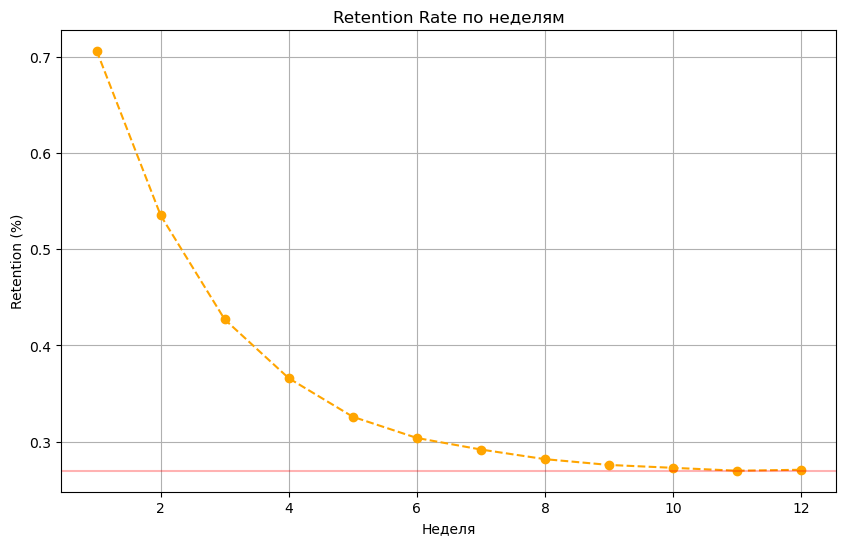

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["week"], df["retention_percentage"], marker="o", linestyle="--", color="orange"
)
plt.title("Retention Rate по неделям")
plt.xlabel("Неделя")
plt.ylabel("Retention (%)")
plt.grid(True)
plt.axhline(y=0.27, color="r", linestyle="-", alpha=0.3)  # Линия стабилизации
plt.show()

In [14]:
# Churn rate: отток на неделе w

df["churn_rate"] = 1 - (df["active_users"] / df["active_users"].shift(1))
df.loc[0, "churn_rate"] = None
df.head()

,week,active_users,total_users,retention_percentage,churn_rate
0,1,706,1000,0.706,NaN
1,2,535,1000,0.535,0.242210
2,3,427,1000,0.427,0.201869
3,4,366,1000,0.366,0.142857
4,5,326,1000,0.326,0.109290


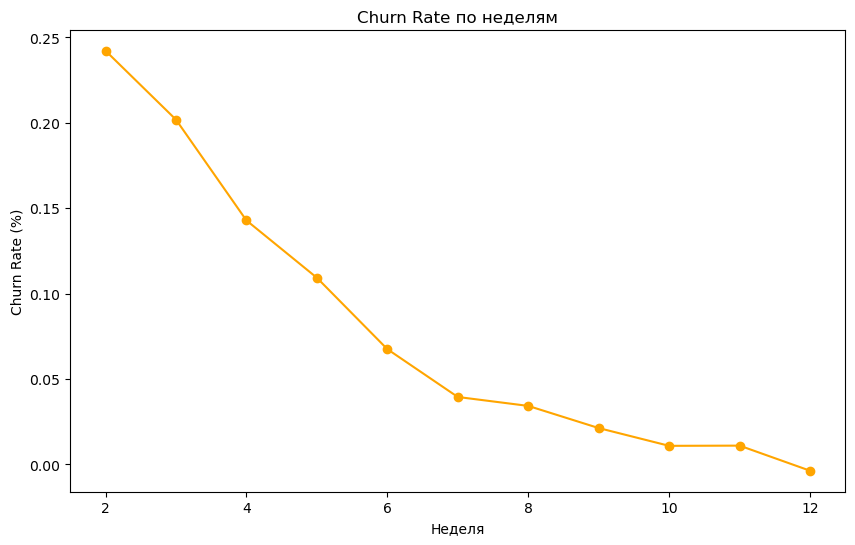

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 6)

plt.plot(df.week, df.churn_rate, marker="o", color="orange")
plt.title("Churn Rate по неделям")
plt.xlabel("Неделя")
plt.ylabel("Churn Rate (%)")
plt.show()

**Ключевые выводы**

- Резкая потеря в первые 2 недели: retention падает с 70.6 % → 53.5 % (churn ≈ 24.3 %) на 2-й неделе — сигнал об узких местах в onboarding.
- Постепенное затухание: с 3-й по 6‑ю неделю каждый churn составляет 15–20 % от оставшихся пользователей, затем замедляется до ~2–3 % еженедельно.
- «Длинная хвостовая» база: после 8‑й недели retention стабилизируется около 27 % (churn ≈ 1 %–1.5 %), это ядро лояльных пользователей.

**Рекомендации**

- Улучшить первые две недели: ввести более прозрачный onboarding, tutorial, вовлекающие пуш‑уведомления.
- Фокус на ядро: понять, что удерживает 25–30 % пользователей (их поведение, сегменты), и масштабировать лучшие практики.
- Cohort‑анализ: сравнить когорты до/после изменений в продукте, чтобы отследить «подъём» retention.
- Churn‑прогнозирование: собрать признаки активности в первую неделю и обучить модель выделять рисковых пользователей для таргетирования.
